In [80]:
#Bibliotecas utilizadas para analise dos dados
import pandas as pd 
import numpy as np
import math
import json


#Leitura e manipulacao de dados no arquivo csv
df = pd.read_csv("./Pedro Henrique Fabriz Ulhoa - dados.csv")
df = df[['ID', 'V1', 'V6', 'V7']]


In [81]:
#printando dataframe de interesse
df

ID                  V1   V6   V7
0    1      Afonso Claudio  6.4  5.0
1    2  Agua Doce do Norte  6.1  4.2
2    3        Aguia Branca  6.8  4.7
3    4              Alegre  5.8  4.2
4    5      Alfredo Chaves  6.3  5.1
..  ..                 ...  ...  ...
73  74               Viana  5.3  4.1
74  75          Vila Pavao  6.8  5.6
75  76        Vila Valerio  6.6  5.2
76  77          Vila Velha  5.6  4.4
77  78             Vitoria  5.6  4.3

[78 rows x 4 columns]

In [82]:
#printando informações importantes 
round(df.describe(), 2)

ID     V6     V7
count  78.00  78.00  78.00
mean   39.50   5.91   4.65
std    22.66   0.43   0.51
min     1.00   4.90   3.70
25%    20.25   5.60   4.30
50%    39.50   5.80   4.60
75%    58.75   6.20   5.00
max    78.00   6.80   5.70

In [130]:
#Separando os dataframes para ficar mais facil de trabalhar
df6 = df[['ID', 'V1', 'V6']]
df7 = df[['ID', 'V1', 'V7']]

#Aqui conseguimos ver um exemplo de query que filtra de acordo com as condicoes

df6.query("V6>= 4.9 & V6<5.1")

ID                      V1   V6
7    8                  Apiaca  4.9
21  22  Divino de Sao Lourenco  4.9
31  32               Ibitirama  5.0

In [131]:
freq1 = len(df6.query("V6>= 4.9 & V6<5.1"))
freq2 = len(df6.query("V6>= 5.1 & V6<5.3"))
freq3 = len(df6.query("V6>= 5.3 & V6<5.5"))
freq4 = len(df6.query("V6>= 5.5 & V6<5.7"))
freq5 = len(df6.query("V6>= 5.7 & V6<5.9"))
freq6 = len(df6.query("V6>= 5.9 & V6<6.1"))
freq7 = len(df6.query("V6>= 6.1 & V6<6.3"))
freq8 = len(df6.query("V6>= 6.3 & V6<6.5"))
freq9 = len(df6.query("V6>= 6.5 & V6<=6.8"))

In [138]:
#criando uma coluna com as faixas
df6 = pd.DataFrame(data={"V6(faixa)": ["4,9 |- 5,1", "5,1 |- 5,3", "5,3 |- 5,5", "5,5 |- 5,7", "5,7 |- 5,9","5,9 |- 6,1","6,1 |- 6,3","6,3 |- 6,5", "6,5 |-| 6,8"]})
df6["Frequencia"] = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8, freq9]

In [139]:
df6["Frequencia Relativa(%)"] = round(df6["Frequencia"] / len(df["V6"]) * 100 , 2)

In [140]:
df6["Frequencia Acumulada(%)"] = [3.85, 5.13, 14.1, 28.2, 51.28, 65.38, 75.64, 88.46, 100]

In [141]:
#Para printar uma tabela bonita
df6.loc[len(df6)] = ["Total", len(df['ID']), "100%", "100%"]

In [142]:
#printando a tabela de frequencia de V6
df6

V6(faixa)  Frequencia Frequencia Relativa(%) Frequencia Acumulada(%)
0   4,9 |- 5,1           3                   3.85                    3.85
1   5,1 |- 5,3           1                   1.28                    5.13
2   5,3 |- 5,5           7                   8.97                    14.1
3   5,5 |- 5,7          11                   14.1                    28.2
4   5,7 |- 5,9          18                  23.08                   51.28
5   5,9 |- 6,1          11                   14.1                   65.38
6   6,1 |- 6,3           8                  10.26                   75.64
7   6,3 |- 6,5          10                  12.82                   88.46
8  6,5 |-| 6,8           9                  11.54                     100
9        Total          78                   100%                    100%

In [143]:
#Agora com df7
df7

ID                  V1   V7
0    1      Afonso Claudio  5.0
1    2  Agua Doce do Norte  4.2
2    3        Aguia Branca  4.7
3    4              Alegre  4.2
4    5      Alfredo Chaves  5.1
..  ..                 ...  ...
73  74               Viana  4.1
74  75          Vila Pavao  5.6
75  76        Vila Valerio  5.2
76  77          Vila Velha  4.4
77  78             Vitoria  4.3

[78 rows x 3 columns]

In [144]:
freq1 = len(df7.query("V7>= 3.7 & V7<3.9"))
freq2 = len(df7.query("V7>= 3.9 & V7<4.1"))
freq3 = len(df7.query("V7>= 4.1 & V7<4.3"))
freq4 = len(df7.query("V7>= 4.3 & V7<4.5"))
freq5 = len(df7.query("V7>= 4.5 & V7<4.7"))
freq6 = len(df7.query("V7>= 4.7 & V7<4.9"))
freq7 = len(df7.query("V7>= 4.9 & V7<5.1"))
freq8 = len(df7.query("V7>= 5.1 & V7<5.3"))
freq9 = len(df7.query("V7>= 5.3 & V7<5.5"))
freq10 = len(df7.query("V7>= 5.5 & V7<=5.7"))

In [145]:
df7 = pd.DataFrame(data={"V7(faixa)": ["3,7 |- 3,9", "3,9 |- 4,1", "4,1 |- 4,3", "4,3 |- 4,5", "4,5 |- 4,7","4,7 |- 4,9","4,9 |- 5,1","5,1 |- 5,3", "5,3 |- 5,5", "5,5 |-| 5,7"]})
df7["Frequencia"] = [freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq8, freq9, freq10]

In [147]:
df7["Frequencia Relativa(%)"] = round(df7["Frequencia"] / len(df["V6"]) * 100 , 2)

In [149]:
df7["Frequencia Acumulada(%)"] = [3.85, 8.98, 23.08, 41.03, 53.85, 65.39, 78.21, 83.34, 91.03, 100]

In [151]:
#Para printar uma tabela bonita
df7.loc[len(df7)] = ["Total", len(df['ID']), "100%", "100%"]

In [152]:
#printando a tabela de frequencia de V6
df7

V7(faixa)  Frequencia Frequencia Relativa(%) Frequencia Acumulada(%)
0    3,7 |- 3,9           3                   3.85                    3.85
1    3,9 |- 4,1           4                   5.13                    8.98
2    4,1 |- 4,3          11                   14.1                   23.08
3    4,3 |- 4,5          14                  17.95                   41.03
4    4,5 |- 4,7          10                  12.82                   53.85
5    4,7 |- 4,9           9                  11.54                   65.39
6    4,9 |- 5,1          10                  12.82                   78.21
7    5,1 |- 5,3           4                   5.13                   83.34
8    5,3 |- 5,5           6                   7.69                   91.03
9   5,5 |-| 5,7           7                   8.97                     100
10        Total          78                   100%                    100%

[]

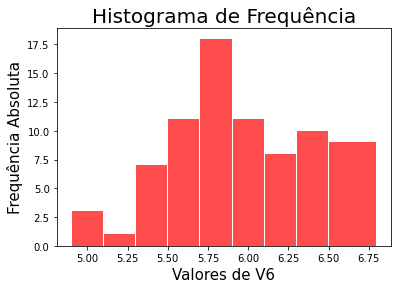

In [185]:
#Aqui é feita uma plotagem da frequencia absoluta de V6 em um gráfico de histograma

import matplotlib.pyplot as plt

bins = [4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.8]

plt.hist(df["V6"], bins, rwidth=0.97, color='red', alpha=0.7)
plt.title('Histograma de Frequência', fontsize=20)
plt.xlabel('Valores de V6', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.plot()

[]

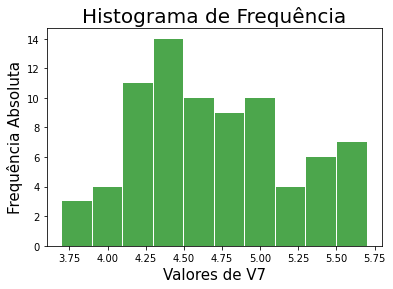

In [186]:
#Aqui é feita uma plotagem da frequencia absoluta de V7 em um gráfico de histograma

#import matplotlib.pyplot as plt

bins = [3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7]

plt.hist(df["V7"], bins, rwidth=0.97, color='green', alpha=0.7)
plt.title('Histograma de Frequência', fontsize=20)
plt.xlabel('Valores de V7', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.plot()

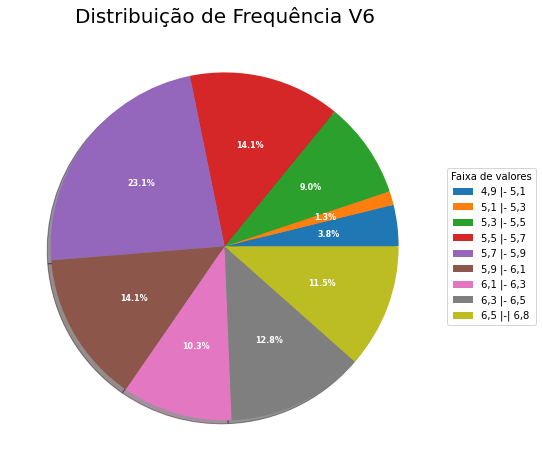

In [238]:
#Outras plotagens interessantes

#Para V6

# import numpy as np
# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

data = df6["Frequencia"].drop(index=9)
faixas = "4,9 |- 5,1", "5,1 |- 5,3", "5,3 |- 5,5", "5,5 |- 5,7", "5,7 |- 5,9","5,9 |- 6,1","6,1 |- 6,3","6,3 |- 6,5", "6,5 |-| 6,8"

# def func(pct):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n({:d} g)".format(pct)


wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"),
                                 shadow=True)

ax.legend(wedges, faixas,
          title="Faixa de valores",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Distribuição de Frequência V6", fontsize = 20)

plt.show()

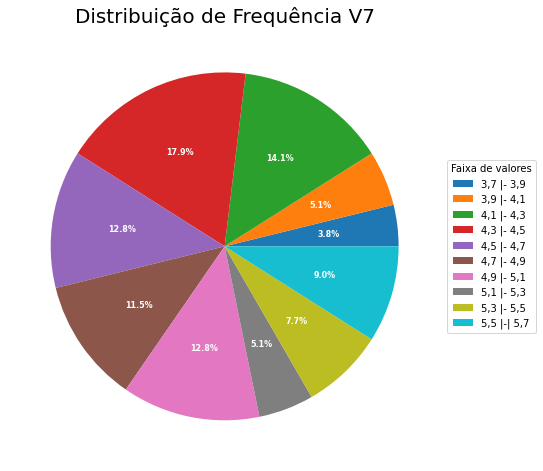

In [239]:
#Outras plotagens interessantes

#Para V7

# import numpy as np
# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

data = df7["Frequencia"].drop(index=10)
faixas = "3,7 |- 3,9", "3,9 |- 4,1", "4,1 |- 4,3", "4,3 |- 4,5", "4,5 |- 4,7","4,7 |- 4,9","4,9 |- 5,1","5,1 |- 5,3", "5,3 |- 5,5", "5,5 |-| 5,7"


wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%',
                                  textprops=dict(color="w"))

ax.legend(wedges, faixas,
          title="Faixa de valores",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Distribuição de Frequência V7", fontsize = 20)

plt.show()

[]

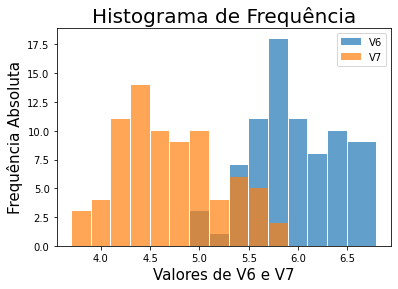

In [237]:
#Juntando os dois gráficos de frequencia absoluta


bins = [3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.8]

plt.hist(df["V6"], bins, rwidth=0.95, alpha=0.7, label='V6')
plt.hist(df["V7"], bins, rwidth=0.95, alpha=0.7, label='V7')
plt.title('Histograma de Frequência', fontsize=20)
plt.xlabel('Valores de V6 e V7', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.legend(loc='upper right')
plt.plot()
